In [41]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

In [3]:
train_path = "../data/processed/train.csv"
val_path = "../data/processed/val.csv"
test_path = "../data/processed/test.csv"


df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

df = pd.concat([df_train, df_val, df_test])

## Label distribution

In [4]:
print(df['label'].value_counts())

label
1    481980
0    195242
Name: count, dtype: int64


/home/oliver_kinch/sentiment_model/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oliver_kinch/sentiment_model/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oliver_kinch/sentiment_model/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


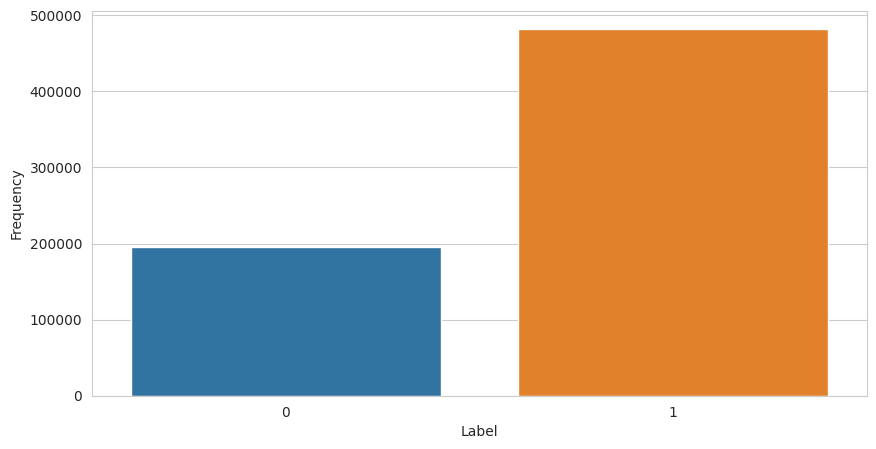

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df)
plt.ylabel("Frequency")
plt.xlabel("Label")
plt.savefig("../figures/label_distribution.png")


## Text statistics

In [14]:
df['length'] = df['text'].apply(lambda x: len(x))
print(df.groupby('label')['length'].mean())


label
0    400.265942
1     90.620725
Name: length, dtype: float64


In [31]:
texts_lengths = df['length'].values

In [42]:
print("Mean text length: ", texts_lengths.mean())

print("Median text length: ", np.median(texts_lengths))

Mean text length:  179.8909367976823
Median text length:  76.0


/home/oliver_kinch/sentiment_model/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oliver_kinch/sentiment_model/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


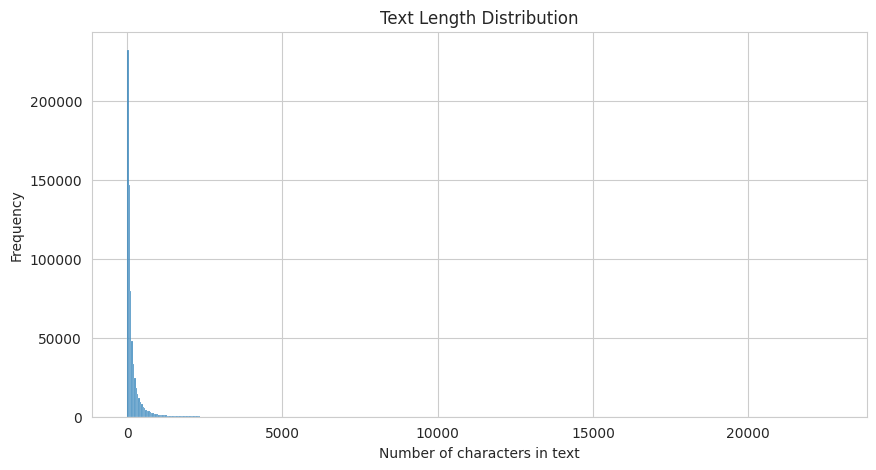

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(texts_lengths, bins=500)
plt.title("Text Length Distribution")
plt.ylabel("Frequency")
plt.xlabel("Number of characters in text")
plt.savefig("../figures/text_length_distribution.png")

## Language distribution

In [46]:
print(df['language'].value_counts())


language
da    647222
sv     10000
en     10000
no     10000
Name: count, dtype: int64


/home/oliver_kinch/sentiment_model/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oliver_kinch/sentiment_model/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oliver_kinch/sentiment_model/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


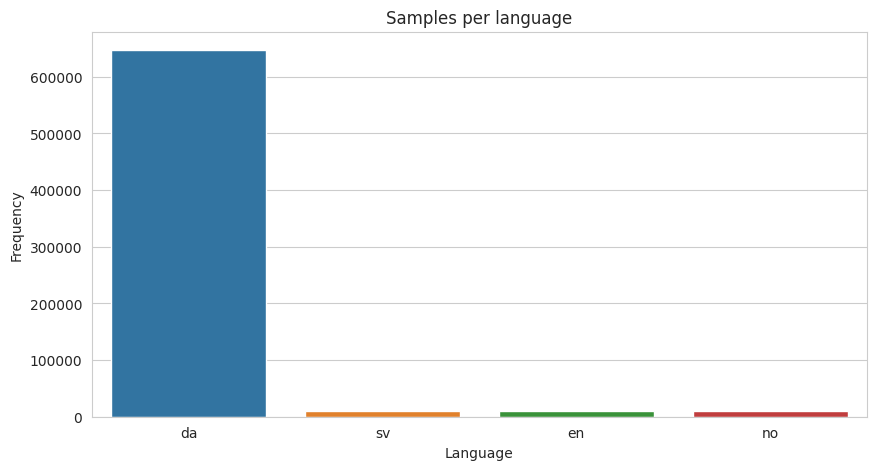

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(x='language', data=df)
plt.title("Samples per language")
plt.ylabel("Frequency")
plt.xlabel("Language")
plt.savefig("../figures/samples_per_language.png")
